In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def hypthesis(X, theta):
    return sigmoid(np.dot(X, theta))


def gradient(X, y, theta):
    return np.dot(X.T, y - hypthesis(X, theta))


def get_y(theta, x):
    return -(theta[0] + (theta[1] * x)) / theta[2]


def hessian(X, theta):
    dim_theta = len(theta)
    H = np.zeros(dim_theta * dim_theta).reshape(dim_theta, dim_theta)
    for i in range(dim_theta):
        for j in range(dim_theta):
            sum = 0
            for k in range(X.shape[0]):
                sum = sum + (X[k, i] * X[k, j] * hypthesis(X[k, :], theta) *
                             (hypthesis(X[k, :], theta) - 1))
            H[i, j] = sum
    return H


In [18]:
def normalize(theta):
    return ([theta[0] / theta[2], theta[1] / theta[2], 1])


def run_newton_method(X, y, theta, epsilon):
    old_theta = theta
    count = 0
    error = 1
    while (error > epsilon):
        old_theta = theta
        H = hessian(X, theta)
        grad = gradient(X, y, theta)
        theta = theta - np.dot(np.linalg.pinv(H), grad)
        print('Iteration : ' + str(count))
        count = count + 1
        error = np.max(np.abs(theta - old_theta))

    return theta


def main(X, labels0, labels1, num_of_examples, y):
    #plot the initial training data
    print('\n\nPlotting the data...\n')
    plt.figure()
    x1 = np.array([X[x, 1:3] for x in labels0])
    x2 = np.array([X[x, 1:3] for x in labels1])
    plt.plot(x1[:, 0], x1[:, 1], 'ro', marker='o', label = 'Class 0')
    plt.plot(x2[:, 0], x2[:, 1], 'bo', marker='^', label = 'Class 1')
    plt.xlabel('x1 -->')
    plt.ylabel('x2 -->')
    plt.legend()
    plt.title('Training Set')
    plt.show(block=False)
    input('\nPress Enter to close\n')
    plt.close()

    theta = np.reshape(np.zeros(3), (3, 1))  #0-initialization of theta

    #run the Newton-Rapson Method
    epsilon = math.pow(10, -10)
    theta = run_newton_method(X, y, theta, epsilon)
    x_lines = [np.min(X[:, 1]), np.max(X[:, 1])]
    # theta = normalize(theta)
    print('\n\nPlotting the data...\n')
    plt.figure()
    x1 = np.array([X[x, 1:3] for x in labels0])
    x2 = np.array([X[x, 1:3] for x in labels1])
    plt.plot(x1[:, 0], x1[:, 1], 'ro', marker='o', label = 'Class 0')
    plt.plot(x2[:, 0], x2[:, 1], 'bo', marker='^', label = 'Class 1')
    plt.plot(x_lines, get_y(theta, x_lines))
    plt.xlabel('x1 -->')
    plt.ylabel('x2-->')
    plt.legend()
    plt.title('Logistic Regression with Decision Boundary')
    plt.show(block=False)
    input('\nPress Enter to close\n')
    plt.close()



Plotting the data...



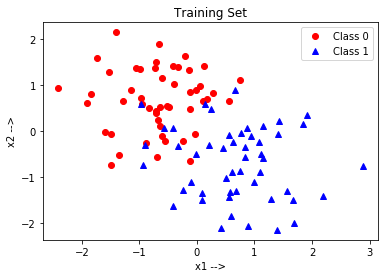


Press Enter to close

Iteration : 0
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8


Plotting the data...



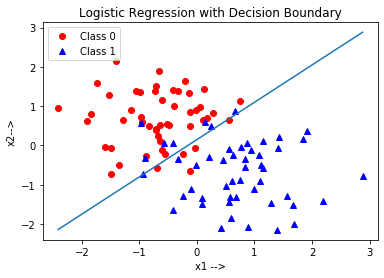


Press Enter to close



In [19]:

if __name__ == '__main__':
    X = np.loadtxt(
        open("./q3/logisticX.csv", "rb"),
        delimiter=",",
        skiprows=0)
    y = np.loadtxt(
        open("./q3/logisticY.csv", "rb"),
        delimiter=",",
        skiprows=0,
        dtype=int)
    m = len(y)

    #separate the labels
    labels0 = []
    labels1 = []
    for i in range(m):
        if (y[i] == 0):
            labels0.append(i)
        else:
            labels1.append(i)

    #feature scaling
    temp = X[:,0].copy()
    temp -= np.mean(X[:, 0])
    temp /= np.std(X[:, 0])
    X[:, 0] = temp
    temp = X[:, 1].copy()
    temp -= np.mean(X[:, 1])
    temp /= np.std(X[:, 1])
    X[:, 1] = temp
    X = np.hstack((np.reshape(np.ones(m), (m, 1)), X))
    main(X, labels0, labels1, m, y.reshape(m, 1))